<a href="https://colab.research.google.com/github/IvanAstorgaC/deep-learning/blob/main/Procesamiento_de_imagenes_basico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 9s 0us/step


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0


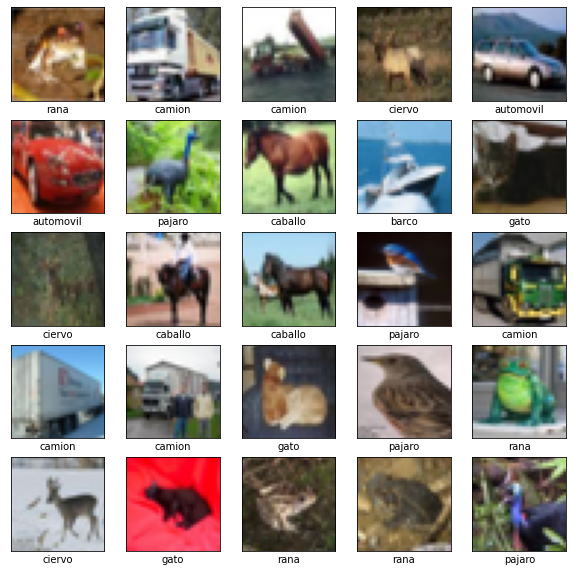

In [ ]:
class_names = ['avion', 'automovil', 'pajaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camion']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5140 - accuracy: 0.4467 - val_loss: 1.2861 - val_accuracy: 0.5494
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1462 - accuracy: 0.5924 - val_loss: 1.1131 - val_accuracy: 0.6068
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9942 - accuracy: 0.6510 - val_loss: 0.9799 - val_accuracy: 0.6600
Epoch 4/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.9016 - accuracy: 0.6827 - val_loss: 0.9273 - val_accuracy: 0.6698
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8177 - accuracy: 0.7134 - val_loss: 0.8836 - val_accuracy: 0.6928
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7614 - accuracy: 0.7335 - val_loss: 0.8768 - val_accuracy: 0.7024
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7062 - accuracy: 0.7531 - val_loss: 0.8560 -

313/313 - 1s - loss: 0.8699 - accuracy: 0.7212 - 1s/epoch - 4ms/step


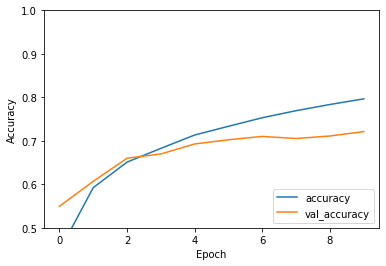

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


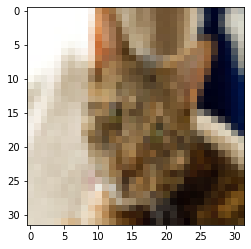

In [ ]:
img_show= plt.imshow(test_images[103])


In [ ]:
img=test_images[103]
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)


In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8.8482204e-07, 7.2252725e-08, 1.6841266e-04, 9.8135090e-01,
       2.8674310e-04, 1.2514151e-02, 5.6624571e-03, 4.2057918e-06,
       2.5143956e-06, 9.6296972e-06], dtype=float32)>

In [ ]:

print(
    "La imagen parece un/a {} con un {:.2f}% de seguridad"
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


La imagen parece un/a gato con un 98.14% de seguridad
